* https://pandas.pydata.org/pandas-docs/stable/#

In [3]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Introduction to Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

## 1. Pandas Data Structures: <font color='red'>Series and DataFrame</font> 

### Series

A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

In [4]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [5]:
counts.values

array([ 632, 1638,  569,  115])

In [6]:
type(counts.values)

numpy.ndarray

We can assign meaningful labels to the index, if they are available:

In [7]:
counts.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
type(counts.index)

pandas.core.indexes.range.RangeIndex

In [9]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [10]:
bacteria['Actinobacteria']

569

In [11]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [12]:
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [13]:
bacteria[0]

632

We can give both the array of values and the index meaningful labels themselves:

In [14]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [15]:
np.log(bacteria)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

In [16]:
print(np.sin(bacteria), np.abs(bacteria), np.sqrt(bacteria))

phylum
Firmicutes       -0.514030
Proteobacteria   -0.942565
Actinobacteria   -0.363228
Bacteroidetes     0.945435
Name: counts, dtype: float64 phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64 phylum
Firmicutes        25.139610
Proteobacteria    40.472213
Actinobacteria    23.853721
Bacteroidetes     10.723805
Name: counts, dtype: float64


We can also filter according to the values in the `Series`:

In [17]:
bacteria[bacteria>1000]

phylum
Proteobacteria    1638
Name: counts, dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [18]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569, 'Bacteroidetes': 115}
pd.Series(bacteria_dict)

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the `NaN` (not a number) type for missing values.

In [19]:
bacteria2 = pd.Series(bacteria_dict, index=['Cyanobacteria','Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [20]:
bacteria2.isna()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [21]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

In [22]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [23]:
data[['phylum','value','patient']]

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


A `DataFrame` has a second index, representing the columns:

In [24]:
data.index

RangeIndex(start=0, stop=8, step=1)

In [25]:
data.columns

Index(['patient', 'phylum', 'value'], dtype='object')

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [24]:
data['phylum']

0        Firmicutes
1    Proteobacteria
2    Actinobacteria
3     Bacteroidetes
4        Firmicutes
5    Proteobacteria
6    Actinobacteria
7     Bacteroidetes
Name: phylum, dtype: object

In [27]:
type(data.value)

pandas.core.series.Series

In [28]:
type(data[['value']])

pandas.core.frame.DataFrame

## 2 . Importing data

A key, but often under-appreciated, step in data analysis is importing the data that we wish to analyze. Though it is easy to load basic data structures into Python using built-in tools or those provided by packages like NumPy, it is non-trivial to import structured data well, and to easily convert this input into a robust data structure:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])

Pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

Let's start with some more bacteria data, stored in csv format.

In [29]:
!cat data/microbiome.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,1174,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,80
Firmicutes,10,162,3196
Firmicutes,11,372,32
Firmicutes,12,4255,4361
Firmicutes,13,107,1667
Firmicutes,14,96,223
Firmicutes,15,281,2377
Proteobacteria,1,1638,3886
Proteobacteria,2,2469,1821
Proteobacteria,3,839,661
Proteobacteria,4,4414,18
Proteobacteria,5,12044,83
Proteobacteria,6,2310,12
Proteobacteria,7,3053,547
Proteobacteria,8,395,2174
Proteobacteria,9,2651,767
Proteobacteria,10,1195,76
Proteobacteria,11,6857,795
Proteobacteria,12,483,666
Proteobacteria,13,2950,3994
Proteobacteria,14,1541,816
Proteobacteria,15,1307,53
Actinobacteria,1,569,648
Actinobacteria,2,1590,4
Actinobacteria,3,25,2
Actinobacteria,4,259,300
Actinobacteria,5,568,7
Actinobacteria,6,1102,9
Actinobacteria,7,678,377
Actinobacteria,8,260,58
Actinobacteria,9,424,233
Actinobacteria,10,548,21
Actinobacteri

This table can be read into a DataFrame using `read_csv`:

In [30]:
mb = pd.read_csv("data/microbiome.csv")
mb

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605
5,Firmicutes,6,693,50
6,Firmicutes,7,718,717
7,Firmicutes,8,173,33
8,Firmicutes,9,228,80
9,Firmicutes,10,162,3196


Notice that `read_csv` automatically considered the first row in the file to be a header row.

We can override default behavior by customizing some the arguments, like `header`, `names` or `index_col`.

In [31]:
pd.read_csv("data/microbiome.csv", header=None).head()

,0,1,2,3
0,Taxon,Patient,Tissue,Stool
1,Firmicutes,1,632,305
2,Firmicutes,2,136,4182
3,Firmicutes,3,1174,703
4,Firmicutes,4,408,3946


`read_csv` is just a convenience function for `read_table`, since csv is such a common format:

In [32]:
mb = pd.read_table("data/microbiome.csv", sep=',')

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately very common in some data formats: 
    
    sep='\s+'

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [33]:
mb = pd.read_csv("data/microbiome.csv", index_col=['Taxon','Patient'])
mb.head()

Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605

This is called a *hierarchical* index, which we will revisit later in the tutorial.

If we have sections of data that we do not wish to import (for example, known bad data), we can populate the `skiprows` argument:

In [34]:
pd.read_csv("data/microbiome.csv", skiprows=[3,4,6]).head()

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,5,831,8605
3,Firmicutes,7,718,717
4,Firmicutes,8,173,33


Conversely, if we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [35]:
pd.read_csv("data/microbiome.csv", nrows=4)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946


Most real-world data is incomplete, with values missing due to incomplete observation, data entry or transcription error, or other reasons. Pandas will automatically recognize and parse common missing data indicators, including `NA` and `NULL`.

In [36]:
!cat data/microbiome_missing.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,NA
Firmicutes,10,162,3196
Firmicutes,11,372,-99999
Firmicutes,12,4255,4361
Firmicutes,13,107,1667
Firmicutes,14,?,223
Firmicutes,15,281,2377
Proteobacteria,1,1638,3886
Proteobacteria,2,2469,1821
Proteobacteria,3,839,661
Proteobacteria,4,4414,18
Proteobacteria,5,12044,83
Proteobacteria,6,2310,12
Proteobacteria,7,3053,547
Proteobacteria,8,395,2174
Proteobacteria,9,2651,767
Proteobacteria,10,1195,76
Proteobacteria,11,6857,795
Proteobacteria,12,483,666
Proteobacteria,13,2950,3994
Proteobacteria,14,1541,816
Proteobacteria,15,1307,53
Actinobacteria,1,569,648
Actinobacteria,2,1590,4
Actinobacteria,3,25,2
Actinobacteria,4,259,300
Actinobacteria,5,568,7
Actinobacteria,6,1102,9
Actinobacteria,7,678,377
Actinobacteria,8,260,58
Actinobacteria,9,424,233
Actinobacteria,10,548,21
Actinobacteria

In [37]:
pd.read_csv("data/microbiome_missing.csv").head(10)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


Above, Pandas recognized `NA` and an empty field as missing data.

In [38]:
pd.isna(pd.read_csv("data/microbiome_missing.csv")).head(10)

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


Unfortunately, there will sometimes be inconsistency with the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [39]:
pd.read_csv("data/microbiome_missing.csv", na_values=['?', -99999]).head(11)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,NaN
9,Firmicutes,10,162.0,3196.0


These can be specified on a column-wise basis using an appropriate dict as the argument for `na_values`.

There are several other data formats that can be imported into Python and converted into DataFrames, with the help of buitl-in or third-party libraries. These include JSON, XML, HDF5, relational and non-relational databases, and various web APIs. These are beyond the scope of this tutorial, but are covered in [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

## 3. Pandas Fundamentals


Please note that many methods, which have keyword argument `inplace`. If you want to change dataframe itself, you have to specify `inplace=True`, that is by default `False` and copies the underlying data.



#### Creating DataFrames

In [40]:
# From dict of Series or dicts
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [41]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [42]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [43]:
# From dict of array-likes
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [44]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [45]:
# From a list of dicts
d = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(d)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [46]:
pd.DataFrame(d, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [47]:
# From a dict of tuples
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
             ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
             ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
             ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
             ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#### Basic Attributes

In [48]:
d = {'one' : np.random.randn(10), 'two' : np.random.rand(10)}
df = pd.DataFrame(d)

In [49]:
df

,one,two
0,1.004599,0.540753
1,-0.093788,0.980968
2,-0.074959,0.970878
3,1.417026,0.145734
4,-0.064804,0.739615
5,-1.764912,0.621009
6,1.972256,0.487133
7,0.842566,0.025176
8,-0.896154,0.473357
9,-1.400487,0.211068


In [50]:
df.head()

,one,two
0,1.004599,0.540753
1,-0.093788,0.980968
2,-0.074959,0.970878
3,1.417026,0.145734
4,-0.064804,0.739615


In [51]:
df.tail()

,one,two
5,-1.764912,0.621009
6,1.972256,0.487133
7,0.842566,0.025176
8,-0.896154,0.473357
9,-1.400487,0.211068


In [52]:
df.head(1)

,one,two
0,1.004599,0.540753


In [53]:
df.shape

(10, 2)

In [54]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [55]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [56]:
df.columns

Index(['one', 'two'], dtype='object')

In [57]:
type(df.columns)

pandas.core.indexes.base.Index

We can extract the underlying data as a simple `ndarray` by accessing the `values` attribute:

In [58]:
df.values

array([[ 1.0045987 ,  0.54075339],
       [-0.09378775,  0.98096814],
       [-0.07495869,  0.97087822],
       [ 1.4170263 ,  0.14573449],
       [-0.06480367,  0.73961533],
       [-1.76491216,  0.62100874],
       [ 1.97225597,  0.48713335],
       [ 0.84256589,  0.02517575],
       [-0.89615368,  0.47335711],
       [-1.40048735,  0.21106758]])

In [59]:
df.size

20

#### Indexing, selection, and filtering

Indexing works analogously to indexing in NumPy arrays, except we can use the labels in the `Index` object to extract values in addition to arrays of integers.

In [60]:
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                  index=['Ohio', 'Colorado', 'Utah', 'New York'],
                  columns=['one', 'two', 'three', 'four'])

Selecting by column name:

In [61]:
df['one']

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

In [62]:
df[['one', 'two']]

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


In [63]:
df.one

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

Selecting by row name:

In [64]:
df.loc['Ohio']

one      0
two      1
three    2
four     3
Name: Ohio, dtype: int64

In [65]:
df.loc[['Ohio', 'Colorado']]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


Selecting by indexes:

In [66]:
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [67]:
df.iloc[1]

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [68]:
df.iloc[1, 2]

6

In [69]:
df.iloc[1:3]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11


In [70]:
df.iloc[1:3, 2]

Colorado     6
Utah        10
Name: three, dtype: int64

In [71]:
df[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


Filtering:

In [72]:
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [73]:
df[df['one'] > 2]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [74]:
df[df['one'] == 2]

,one,two,three,four


In [75]:
df[df['one'] != 4]

,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11
New York,12,13,14,15


In [76]:
df.loc[df['one'] >2]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [77]:
df.loc[(df['one'] > 2) & (df['two'] > 5)]

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [78]:
df.loc[df['one'].isin([0, 8])]

,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11


In [79]:
df.three > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

#### Reindexing

With DataFrame, reindex can alter either the (row) index, columns, or both. When
passed just a sequence, the rows are reindexed in the result:

In [80]:
df = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])

In [81]:
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [82]:
df.reindex(['a', 'b', 'c', 'd'])

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [83]:
# reversing
df.reindex(df.index[::-1])

,Ohio,Texas,California
d,6,7,8
c,3,4,5
a,0,1,2


Reindexing columns:

In [84]:
states = ['Texas', 'Utah', 'California']
df.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


Reindexing columns and rows:

In [85]:
df.reindex(index=['a', 'b', 'c', 'd'], columns=states)

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


Filling values while reindexing:

In [143]:
df.reindex(index=['a', 'b', 'c', 'd'], method='ffill')

TypeError: '<' not supported between instances of 'str' and 'int'

In [144]:
df.reindex(index=['a', 'b', 'c', 'd'], method='bfill')

TypeError: '>' not supported between instances of 'str' and 'int'

#### Dropping entries from an axis

Dropping one or more entries from an axis is easy if you have an index array or list
without those entries. As that can require a bit of munging and set logic, the drop
method will return a new object with the indicated value or values deleted from an axis:

In [145]:
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                  index=['Ohio', 'Colorado', 'Utah', 'New York'],
                  columns=['one', 'two', 'three', 'four'])

In [146]:
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [147]:
df.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [148]:
df.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [149]:
df.drop(columns=['two'])

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


#### Set / Reset Index

In [150]:
df = pd.DataFrame({'a' : ['bar', 'bar', 'foo', 'foo'],
                   'b' : ['one', 'two', 'one', 'two'],
                   'c' : ['z', 'y', 'x', 'w'],
                   'd' : range(1, 5)})

In [151]:
df

,a,b,c,d
0,bar,one,z,1
1,bar,two,y,2
2,foo,one,x,3
3,foo,two,w,4


In [152]:
df.set_index(['c'])

,a,b,d
c,,,
z,bar,one,1
y,bar,two,2
x,foo,one,3
w,foo,two,4


In [153]:
df.set_index(['c', 'a'])

,,b,d
c,a,,
z,bar,one,1
y,bar,two,2
x,foo,one,3
w,foo,two,4


In [154]:
df.set_index(['a', 'b'], inplace=True)

In [155]:
df

c  d
a   b        
bar one  z  1
    two  y  2
foo one  x  3
    two  w  4

In [156]:
df.reset_index()

,a,b,c,d
0,bar,one,z,1
1,bar,two,y,2
2,foo,one,x,3
3,foo,two,w,4


In [157]:
df.reset_index(level='a')

,a,c,d
b,,,
one,bar,z,1
two,bar,y,2
one,foo,x,3
two,foo,w,4


#### Manipulating dataframe values

In [158]:
df = pd.DataFrame({'a' : ['bar', 'bar', 'foo', 'foo'],
                   'b' : ['one', 'two', 'one', 'two'],
                   'c' : ['z', 'y', 'x', 'w'],
                   'd' : range(1, 5)})

In [159]:
df

,a,b,c,d
0,bar,one,z,1
1,bar,two,y,2
2,foo,one,x,3
3,foo,two,w,4


Inserting new column:

In [160]:
df['year'] = 2013
df

,a,b,c,d,year
0,bar,one,z,1,2013
1,bar,two,y,2,2013
2,foo,one,x,3,2013
3,foo,two,w,4,2013


In [161]:
df['year'] = range(2013, 2013 + len(df), 1)
df

,a,b,c,d,year
0,bar,one,z,1,2013
1,bar,two,y,2,2014
2,foo,one,x,3,2015
3,foo,two,w,4,2016


Other Python data structures (ones without an index) need to be the same length as the `DataFrame`:

In [162]:
month = ['jan', 'feb', 'mar']

df['month'] = month
df

ValueError: Length of values does not match length of index

In [163]:
month = ['jan', 'feb', 'mar', 'jan']

df['month'] = month
df

,a,b,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,4,2016,jan


Inserting new row:

In [164]:
df.loc[4] = [2,3,4,2, 3, 3]
df

,a,b,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,4,2016,jan
4,2,3,4,2,3,3


Its important to note that the Series returned when a DataFrame is indexted is merely a **view** on the DataFrame, and not a copy of the data itself. So you must be cautious when manipulating this data:

In [165]:
vals = df.d
vals

0    1
1    2
2    3
3    4
4    2
Name: d, dtype: int64

In [166]:
vals[3] = 0
vals

0    1
1    2
2    3
3    0
4    2
Name: d, dtype: int64

In [167]:
df

,a,b,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,0,2016,jan
4,2,3,4,2,3,3


In [168]:
vals = df.d.copy()
vals[3] = 1000
df

,a,b,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,0,2016,jan
4,2,3,4,2,3,3


We can create or modify columns by assignment:

In [169]:
df.year[3] = 144444
df

,a,b,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,0,144444,jan
4,2,3,4,2,3,3


Repleacing values:

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the `a` variable in dataset:

In [170]:
df.drop(index=4, inplace=True)
df

,a,b,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,0,144444,jan


In [171]:
df.a.value_counts()

bar    2
foo    2
Name: a, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "foo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the map method to implement the changes.

In [172]:
a_map = {'foo': 0, 'bar': 1}

In [173]:
df.a.map(a_map)

0    1
1    1
2    0
3    0
Name: a, dtype: int64

Alternately, if we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method.

In [174]:
df.replace('foo', 0)

,a,b,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,0,one,x,3,2015,mar
3,0,two,w,0,144444,jan


In [175]:
df.replace(a_map)

,a,b,c,d,year,month
0,1,one,z,1,2013,jan
1,1,two,y,2,2014,feb
2,0,one,x,3,2015,mar
3,0,two,w,0,144444,jan


Pandas uses a custom data structure to represent the indices of Series and DataFrames.

In [176]:
df.index

Int64Index([0, 1, 2, 3], dtype='int64')

Index objects are immutable:

In [177]:
df.index[0] = 15

TypeError: Index does not support mutable operations

In [178]:
df

,a,b,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,0,144444,jan


This is so that Index objects can be shared between data structures without fear that they will be changed.

#### One-hot-encoding

For some statistical analyses (e.g. regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called design matrix. The Pandas function `get_dummies` (indicator variables are also known as dummy variables) makes this transformation straightforward.

In [179]:
df.c.value_counts()

w    1
y    1
z    1
x    1
Name: c, dtype: int64

In [180]:
# one-hot-encoding c column
pd.get_dummies(df, columns=['c'])

,a,b,d,year,month,c_w,c_x,c_y,c_z
0,bar,one,1,2013,jan,0,0,0,1
1,bar,two,2,2014,feb,0,0,1,0
2,foo,one,3,2015,mar,0,1,0,0
3,foo,two,0,144444,jan,1,0,0,0


#### Renaming / mapping labels

The `rename()` method allows you to relabel an axis based on some mapping (a dict or Series) or an arbitrary function.

In [181]:
df.rename(columns={'a': 'aaa', 'b': 'boooo'})

,aaa,boooo,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,0,144444,jan


In [182]:
df

,a,b,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,0,144444,jan


In [183]:
df.rename(columns={'a': 'aaa', 'b': 'boooo'}, inplace=True)

In [184]:
df

,aaa,boooo,c,d,year,month
0,bar,one,z,1,2013,jan
1,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,0,144444,jan


In [185]:
df.rename(index={0: 'a', 1: 'bbbhh'})

,aaa,boooo,c,d,year,month
a,bar,one,z,1,2013,jan
bbbhh,bar,two,y,2,2014,feb
2,foo,one,x,3,2015,mar
3,foo,two,w,0,144444,jan


## 4. Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

#### Arithmetic operations

In [186]:
df = pd.DataFrame({'one': np.random.randn(5),
                  'two': np.random.rand(5)})

In [187]:
df

,one,two
0,-0.536033,0.473056
1,1.204565,0.431883
2,0.444715,0.247382
3,1.789576,0.766431
4,-0.806353,0.616072


In [188]:
df['sum'] = df.one + df.two
df

,one,two,sum
0,-0.536033,0.473056,-0.062977
1,1.204565,0.431883,1.636448
2,0.444715,0.247382,0.692096
3,1.789576,0.766431,2.556007
4,-0.806353,0.616072,-0.190281


In [132]:
df['mult'] = df.one * df.two
df

,one,two,sum,mult
0,2.199431,0.704125,2.903556,1.548674
1,-1.788551,0.762413,-1.026138,-1.363614
2,-0.532718,0.904331,0.371614,-0.481753
3,0.335121,0.014629,0.349750,0.004903
4,0.339980,0.761734,1.101714,0.258974


In [133]:
df['log_one'] = np.log(df.one)
df

,one,two,sum,mult,log_one
0,2.199431,0.704125,2.903556,1.548674,0.788199
1,-1.788551,0.762413,-1.026138,-1.363614,NaN
2,-0.532718,0.904331,0.371614,-0.481753,NaN
3,0.335121,0.014629,0.349750,0.004903,-1.093265
4,0.339980,0.761734,1.101714,0.258974,-1.078869


#### Row or Column-wise Function Application

Arbitrary functions can be applied along the axes of a DataFrame using the `apply()` method, which, like the descriptive statistics methods, take an optional axis argument:

In [134]:
df.apply(np.mean)

one        0.110653
two        0.629447
sum        0.740099
mult      -0.006563
log_one   -0.461312
dtype: float64

In [135]:
df.apply(np.mean, axis=1)

0    1.628797
1   -0.853972
2    0.065369
3   -0.077773
4    0.276706
dtype: float64

In [136]:
f = lambda x: x.max() - x.min()

In [137]:
df.apply(f)

one        3.987981
two        0.889702
sum        3.929693
mult       2.912289
log_one    1.881463
dtype: float64

In [138]:
df.apply(np.cumsum)

,one,two,sum,mult,log_one
0,2.199431,0.704125,2.903556,1.548674,0.788199
1,0.410880,1.466538,1.877418,0.185060,NaN
2,-0.121838,2.370869,2.249032,-0.296693,NaN
3,0.213283,2.385499,2.598781,-0.291790,-0.305066
4,0.553263,3.147233,3.700495,-0.032816,-1.383936


Depending on the return type of the function passed to `apply()`, the result will either be of lower dimension or the same dimension.

`apply()` combined with some cleverness can be used to answer many questions about a data set. For example, suppose we wanted to extract the date where the maximum value for each column occurred:

In [139]:
df.apply(lambda x: x.idxmax())

one        0
two        2
sum        0
mult       0
log_one    0
dtype: int64

In [140]:
df.apply(np.cumsum).apply(lambda x: x.idxmax())

one        0
two        4
sum        4
mult       0
log_one    0
dtype: int64

#### Applying elementwise Python functions

In [140]:
def f(x):
    return x + x

In [141]:
# for frames
df.applymap(f)

,one,two,sum,mult,log_one
0,0.329934,0.296059,0.625994,0.048840,-3.604017
1,1.852433,1.230904,3.083337,1.140084,-0.153295
2,-0.689583,0.010578,-0.679006,-0.003647,NaN
3,1.934231,1.123080,3.057311,1.086148,-0.066875
4,-0.220108,0.440888,0.220780,-0.048522,NaN


In [142]:
# for Series
df['one'].map(lambda x: len(str(x)))

0    19
1    18
2    19
3    18
4    20
Name: one, dtype: int64

#### Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On occasion we may want to perform operations on *groups* of observations within a dataset. For exmaple:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [143]:
cdystonia = pd.read_csv("data/cdystonia.csv", index_col=None).head(50)
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [144]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

This *grouped* dataset is hard to visualize



In [145]:
cdystonia_grouped

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [146]:
for patient, group in cdystonia_grouped:
    print(patient)
    print(group) 
    print('\n')

1
   patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39
5        1    6    16     1   1  5000U   65   F      36


2
    patient  obs  week  site  id   treat  age sex  twstrs
6         2    1     0     1   2  10000U   70   F      60
7         2    2     2     1   2  10000U   70   F      26
8         2    3     4     1   2  10000U   70   F      27
9         2    4     8     1   2  10000U   70   F      41
10        2    5    12     1   2  10000U   70   F      65
11        2    6    16     1   2  10000U   70   F      67


3
    patient  obs  week  site  id  treat  age sex  twstrs
12        3    1     0     1   3  5000U   64   F      44
13        3    2     2     1   3  5000U   64   F      20
14        3    3     

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [147]:
cdystonia.groupby(cdystonia.patient).aggregate(np.mean).head()

,obs,week,site,id,age,twstrs
patient,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000
2,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.5,7.0,1.0,3.0,64.0,30.500000
4,2.5,3.5,1.0,4.0,59.0,60.000000
5,3.5,7.0,1.0,5.0,76.0,46.166667


Notice that the `treat` and `sex` variables are not included in the aggregation. Since it does not make sense to aggregate non-string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

In [148]:
cdystonia.groupby(cdystonia.patient).mean().head()

,obs,week,site,id,age,twstrs
patient,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000
2,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.5,7.0,1.0,3.0,64.0,30.500000
4,2.5,3.5,1.0,4.0,59.0,60.000000
5,3.5,7.0,1.0,5.0,76.0,46.166667


If we wish, we can easily aggregate according to multiple keys:

In [149]:
cdystonia.groupby(['week','site']).mean().head()

,,patient,obs,id,age,twstrs
week,site,,,,,
0,1,5.000000,1.0,5.000000,61.888889,45.333333
2,1,5.000000,2.0,5.000000,61.888889,33.666667
4,1,5.000000,3.0,5.000000,61.888889,35.111111
8,1,5.000000,4.0,5.000000,61.888889,40.888889
12,1,4.571429,5.0,4.571429,63.714286,43.142857


In [150]:
cdystonia.groupby(['week','site']).std().head()

,,patient,obs,id,age,twstrs
week,site,,,,,
0,1,2.738613,0.0,2.738613,11.039072,9.246621
2,1,2.738613,0.0,2.738613,11.039072,11.258330
4,1,2.738613,0.0,2.738613,11.039072,14.181365
8,1,2.738613,0.0,2.738613,11.039072,11.351701
12,1,2.636737,0.0,2.636737,11.870331,10.915258


Alternately, we can **transform** the data, using a function of our choice with the `transform` method:

In [151]:
normalize = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

,obs,week,site,id,age,twstrs
0,-1.336306,-1.135550,NaN,NaN,NaN,-0.181369
1,-0.801784,-0.811107,NaN,NaN,NaN,-0.544107
2,-0.267261,-0.486664,NaN,NaN,NaN,-1.632322
3,0.267261,0.162221,NaN,NaN,NaN,0.725476
4,0.801784,0.811107,NaN,NaN,NaN,1.088214


It is easy to do column selection within `groupby` operations, if we are only interested split-apply-combine operations on a subset of columns:

In [152]:
cdystonia_grouped['twstrs'].mean().head()

patient
1    33.000000
2    47.666667
3    30.500000
4    60.000000
5    46.166667
Name: twstrs, dtype: float64

In [153]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

,twstrs
patient,
1,33.000000
2,47.666667
3,30.500000
4,60.000000
5,46.166667


If you simply want to divide your DataFrame into chunks for later use, its easy to convert them into a dict so that they can be easily indexed out as needed:

In [154]:
chunks = dict(list(cdystonia_grouped))

In [155]:
chunks[4]

,patient,obs,week,site,id,treat,age,sex,twstrs
18,4,1,0,1,4,Placebo,59,F,53
19,4,2,2,1,4,Placebo,59,F,61
20,4,3,4,1,4,Placebo,59,F,64
21,4,4,8,1,4,Placebo,59,F,62


#### Sorting by index and value

Sorting by index:

In [156]:
df

,one,two,sum,mult,log_one
0,0.164967,0.148030,0.312997,0.024420,-1.802009
1,0.926216,0.615452,1.541668,0.570042,-0.076647
2,-0.344792,0.005289,-0.339503,-0.001824,NaN
3,0.967115,0.561540,1.528655,0.543074,-0.033438
4,-0.110054,0.220444,0.110390,-0.024261,NaN


In [157]:
df.sort_index()

,one,two,sum,mult,log_one
0,0.164967,0.148030,0.312997,0.024420,-1.802009
1,0.926216,0.615452,1.541668,0.570042,-0.076647
2,-0.344792,0.005289,-0.339503,-0.001824,NaN
3,0.967115,0.561540,1.528655,0.543074,-0.033438
4,-0.110054,0.220444,0.110390,-0.024261,NaN


In [158]:
df.sort_index(axis=1)    

,log_one,mult,one,sum,two
0,-1.802009,0.024420,0.164967,0.312997,0.148030
1,-0.076647,0.570042,0.926216,1.541668,0.615452
2,NaN,-0.001824,-0.344792,-0.339503,0.005289
3,-0.033438,0.543074,0.967115,1.528655,0.561540
4,NaN,-0.024261,-0.110054,0.110390,0.220444


In [159]:
df.sort_index(ascending=False)

,one,two,sum,mult,log_one
4,-0.110054,0.220444,0.110390,-0.024261,NaN
3,0.967115,0.561540,1.528655,0.543074,-0.033438
2,-0.344792,0.005289,-0.339503,-0.001824,NaN
1,0.926216,0.615452,1.541668,0.570042,-0.076647
0,0.164967,0.148030,0.312997,0.024420,-1.802009


In [160]:
df

,one,two,sum,mult,log_one
0,0.164967,0.148030,0.312997,0.024420,-1.802009
1,0.926216,0.615452,1.541668,0.570042,-0.076647
2,-0.344792,0.005289,-0.339503,-0.001824,NaN
3,0.967115,0.561540,1.528655,0.543074,-0.033438
4,-0.110054,0.220444,0.110390,-0.024261,NaN


In [161]:
df.sort_index(by='two')

,one,two,sum,mult,log_one
2,-0.344792,0.005289,-0.339503,-0.001824,NaN
0,0.164967,0.148030,0.312997,0.024420,-1.802009
4,-0.110054,0.220444,0.110390,-0.024261,NaN
3,0.967115,0.561540,1.528655,0.543074,-0.033438
1,0.926216,0.615452,1.541668,0.570042,-0.076647


Sorting all DataFrame by values:

In [162]:
df

,one,two,sum,mult,log_one
0,0.164967,0.148030,0.312997,0.024420,-1.802009
1,0.926216,0.615452,1.541668,0.570042,-0.076647
2,-0.344792,0.005289,-0.339503,-0.001824,NaN
3,0.967115,0.561540,1.528655,0.543074,-0.033438
4,-0.110054,0.220444,0.110390,-0.024261,NaN


In [163]:
df.sort_values(by=['one'])

,one,two,sum,mult,log_one
2,-0.344792,0.005289,-0.339503,-0.001824,NaN
4,-0.110054,0.220444,0.110390,-0.024261,NaN
0,0.164967,0.148030,0.312997,0.024420,-1.802009
1,0.926216,0.615452,1.541668,0.570042,-0.076647
3,0.967115,0.561540,1.528655,0.543074,-0.033438


In [164]:
df.sort_values(by=[3], axis=1)

,log_one,mult,two,one,sum
0,-1.802009,0.024420,0.148030,0.164967,0.312997
1,-0.076647,0.570042,0.615452,0.926216,1.541668
2,NaN,-0.001824,0.005289,-0.344792,-0.339503
3,-0.033438,0.543074,0.561540,0.967115,1.528655
4,NaN,-0.024261,0.220444,-0.110054,0.110390


Ranking numeric values:

In [165]:
df

,one,two,sum,mult,log_one
0,0.164967,0.148030,0.312997,0.024420,-1.802009
1,0.926216,0.615452,1.541668,0.570042,-0.076647
2,-0.344792,0.005289,-0.339503,-0.001824,NaN
3,0.967115,0.561540,1.528655,0.543074,-0.033438
4,-0.110054,0.220444,0.110390,-0.024261,NaN


In [166]:
df.rank()

,one,two,sum,mult,log_one
0,3.0,2.0,3.0,3.0,1.0
1,4.0,5.0,5.0,5.0,2.0
2,1.0,1.0,1.0,2.0,NaN
3,5.0,4.0,4.0,4.0,3.0
4,2.0,3.0,2.0,1.0,NaN


In [167]:
df.rank(axis=1)

,one,two,sum,mult,log_one
0,4.0,3.0,5.0,2.0,1.0
1,4.0,3.0,5.0,2.0,1.0
2,1.0,4.0,2.0,3.0,NaN
3,4.0,3.0,5.0,2.0,1.0
4,1.0,4.0,3.0,2.0,NaN


#### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects.

In [168]:
df = pd.DataFrame({'one': ['a', 'a', 'b', 1],
                   'two': [10, 11, 2, 2]})

In [169]:
df

,one,two
0,a,10
1,a,11
2,b,2
3,1,2


In [170]:
df.duplicated(subset=['one'])

0    False
1     True
2    False
3    False
dtype: bool

In [171]:
df.duplicated(subset=['two'])

0    False
1    False
2    False
3     True
dtype: bool

In [172]:
# there is no fully duplicated row for the whole data
df.duplicated()

0    False
1    False
2    False
3    False
dtype: bool

In [173]:
df.drop_duplicates(subset=['one'])

,one,two
0,a,10
2,b,2
3,1,2


In [174]:
df.drop_duplicates()

,one,two
0,a,10
1,a,11
2,b,2
3,1,2


In [175]:
df = pd.DataFrame({'one': ['a', 'a', 'b', 1],
                   'two': [10, 10, 2, 2]})

In [176]:
df

,one,two
0,a,10
1,a,10
2,b,2
3,1,2


In [177]:
# in this cas second row is fully duplicate of the first one
df.duplicated()

0    False
1     True
2    False
3    False
dtype: bool

#### Dealing with NaNs

We can easily identify and remove `NaNs` from `DataFrame` objects.

In [178]:
df = pd.read_csv("data/microbiome_missing.csv").head(10)

In [179]:
df.isna()

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


In [180]:
# removing the whole row, if all elements in the row are NaN
df.dropna(how='all')

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


Filling NaNs:

In [181]:
# by some value
df.fillna(value=123334433)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,123334433,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,123334433.0
9,Firmicutes,10,162,3196.0


In [182]:
# by some method 
df.fillna(method='ffill')

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,136,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,33.0
9,Firmicutes,10,162,3196.0


In [183]:
# by some method 
df.fillna(method='bfill')

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,408,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,3196.0
9,Firmicutes,10,162,3196.0


## 5. Combining and Merging Data Sets

Data contained in pandas objects can be combined together in a number of built-in
ways:
* `pandas.merge` connects rows in DataFrames based on one or more keys. This will
be familiar to users of SQL or other relational databases, as it implements database
join operations.
* `pandas.concat` glues or stacks together objects along an axis.
* `combine_first` instance method enables splicing together overlapping data to fill
in missing values in one object with values from another.

In [184]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

In [185]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [186]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [187]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [188]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [189]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [190]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [191]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                     'data1': range(6)})

In [192]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'], 
                     'data2': range(5)})

In [193]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [194]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [195]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [196]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


### Exercise

Investigate this tutorial:
* https://pandas.pydata.org/pandas-docs/stable/merging.html

## 6. Data summarization

We often wish to summarize data in `Series` or `DataFrame` objects, so that they can more easily be understood or compared with similar data. The NumPy package contains several functions that are useful here, but several summarization or reduction methods are built into Pandas data structures.

In [197]:
df = pd.DataFrame({'normal': np.random.randn(100),
                   'uniform': np.random.rand(100),
                   'exp': np.random.exponential(size=100)})

In [198]:
df.head()

,exp,normal,uniform
0,1.311929,0.428421,0.227102
1,4.033050,-0.983952,0.313317
2,0.132653,0.000031,0.388881
3,0.767867,0.311110,0.946755
4,0.172476,-0.664142,0.078785


In [199]:
df.sum()

exp        100.356601
normal       6.090806
uniform     53.209229
dtype: float64

In [200]:
df.mean()

exp        1.003566
normal     0.060908
uniform    0.532092
dtype: float64

In [201]:
df.var()

exp        1.047833
normal     1.103759
uniform    0.078598
dtype: float64

In [202]:
df.cov()

,exp,normal,uniform
exp,1.047833,-0.140335,0.005065
normal,-0.140335,1.103759,0.045073
uniform,0.005065,0.045073,0.078598


In [203]:
df.std()

exp        1.023637
normal     1.050600
uniform    0.280354
dtype: float64

In [204]:
df.corr()

,exp,normal,uniform
exp,1.000000,-0.130491,0.017648
normal,-0.130491,1.000000,0.153028
uniform,0.017648,0.153028,1.000000


In [205]:
df.min()

exp        0.006575
normal    -2.440738
uniform    0.001489
dtype: float64

In [206]:
df.max()

exp        4.925770
normal     2.487287
uniform    0.995178
dtype: float64

In [207]:
df.kurtosis()

exp        2.822309
normal    -0.352073
uniform   -1.123245
dtype: float64

In [208]:
df.skew()

exp        1.664940
normal    -0.257311
uniform   -0.070136
dtype: float64

In [209]:
df.describe()

,exp,normal,uniform
count,100.000000,100.000000,100.000000
mean,1.003566,0.060908,0.532092
std,1.023637,1.050600,0.280354
min,0.006575,-2.440738,0.001489
25%,0.257398,-0.655474,0.306868
50%,0.631568,0.158213,0.530976
75%,1.383004,0.783036,0.769424
max,4.925770,2.487287,0.995178


## 7. Data Plotting

In [210]:
df.head()

,exp,normal,uniform
0,1.311929,0.428421,0.227102
1,4.033050,-0.983952,0.313317
2,0.132653,0.000031,0.388881
3,0.767867,0.311110,0.946755
4,0.172476,-0.664142,0.078785


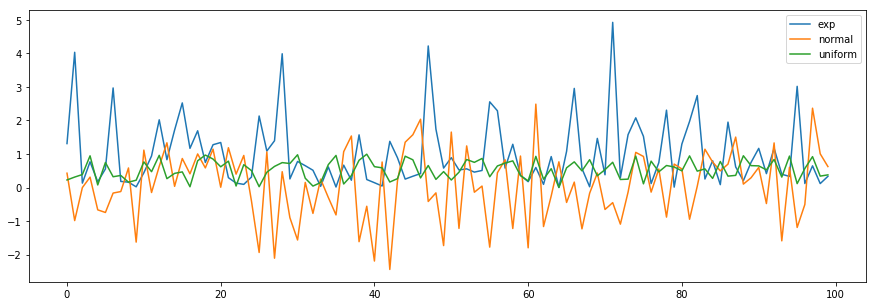

In [211]:
df.plot(figsize=(15, 5))

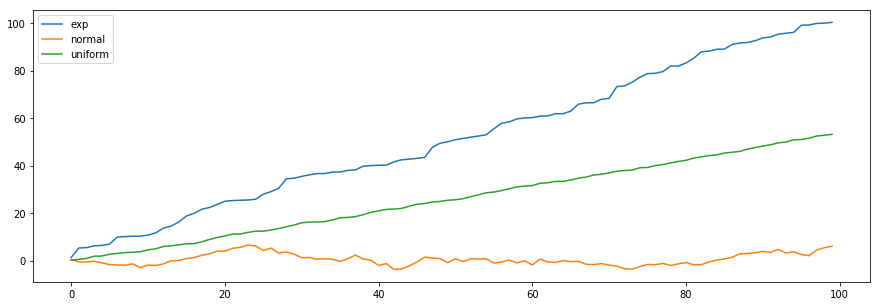

In [212]:
df.cumsum(0).plot(figsize=(15,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cdd001c50>,
      dtype=object)

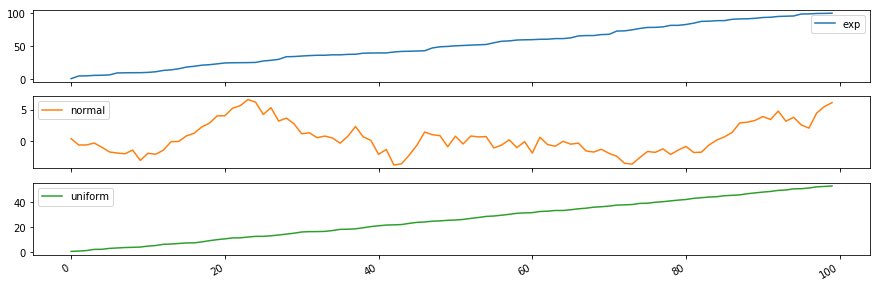

In [213]:
df.cumsum(0).plot(figsize=(15,5), subplots=True)

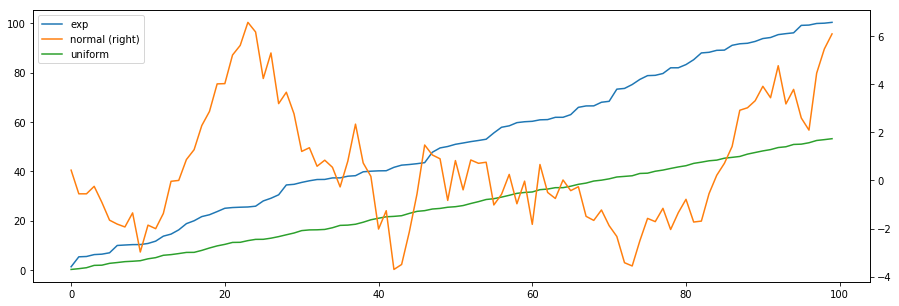

In [214]:
df.cumsum(0).plot(figsize=(15,5),secondary_y='normal')

### Exercise

Investigate this tutorial:
* https://pandas.pydata.org/pandas-docs/stable/visualization.html

## 8. Writing Data to Files

As well as being able to read several data input formats, Pandas can also export data to a variety of storage formats. We will bring your attention to just a couple of these.

In [215]:
df.to_csv("df.csv")

The `to_csv` method writes a `DataFrame` to a comma-separated values (csv) file. You can specify custom delimiters (via `sep` argument), how missing values are written (via `na_rep` argument), whether the index is writen (via `index` argument), whether the header is included (via `header` argument), among other options.

An efficient way of storing data to disk is in binary format. Pandas supports this using Python’s built-in pickle serialization.

In [216]:
df.to_pickle("df_pickle")

The complement to `to_pickle` is the `read_pickle` function, which restores the pickle to a `DataFrame` or `Series`:

In [217]:
pd.read_pickle("df_pickle")

,exp,normal,uniform
0,1.311929,0.428421,0.227102
1,4.033050,-0.983952,0.313317
2,0.132653,0.000031,0.388881
3,0.767867,0.311110,0.946755
4,0.172476,-0.664142,0.078785
5,0.556350,-0.742089,0.747949
6,2.969939,-0.163625,0.323073
7,0.183444,-0.118385,0.361338
8,0.161325,0.584693,0.161533
9,0.022829,-1.625621,0.219339
